In [2]:
#Importation du fichier de données
import os
os.chdir('/Users/learegazzetti/Documents/Cours/M1_Info/Data_Mining_M1_Info/Projet')

import pandas
df = pandas.read_csv('data_avec_etiquettes.txt', sep = '\t')

In [3]:
#Recodage de la variable cible pour le scoring
import numpy
df['V200_recod'] = numpy.where(df['V200']=='m16', 'positive', 'negative')

In [4]:
print(df['V200_recod'].value_counts())

negative    492981
positive      1040
Name: V200_recod, dtype: int64


In [5]:
print(df.head())

   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V192  V193  V194  V195  V196  \
0   0   0   1   5   0   8   0   1   5    1  ...   1.0   0.0  0.11   0.0   0.0   
1   0   0   1   1   1   7   0   1   8    1  ...   1.0   0.0  0.05   0.0   0.0   
2   1   0   0   9   0   2   0   0   3    1  ...   1.0   0.0  0.03   0.0   0.0   
3   0   0   0   5   0   3   1   0   0    0  ...   1.0   0.0  0.03   0.0   0.0   
4   0   1   0   9   1   4   0   1   4    1  ...   1.0   0.0  0.02   0.0   0.0   

   V197  V198  V199  V200  V200_recod  
0   0.0   0.0   0.0   m12    negative  
1   0.0   0.0   0.0   m12    negative  
2   0.0   0.0   0.0   m12    negative  
3   0.0   0.0   0.0   m12    negative  
4   0.0   0.0   0.0   m12    negative  

[5 rows x 201 columns]


In [6]:
#On ne garde pas la variable cible avec les 23 modalités
df = df.loc[:,df.columns!="V200"]

In [7]:
print(df.head())

   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V191  V192  V193  V194  V195  \
0   0   0   1   5   0   8   0   1   5    1  ...     9   1.0   0.0  0.11   0.0   
1   0   0   1   1   1   7   0   1   8    1  ...    19   1.0   0.0  0.05   0.0   
2   1   0   0   9   0   2   0   0   3    1  ...    29   1.0   0.0  0.03   0.0   
3   0   0   0   5   0   3   1   0   0    0  ...    39   1.0   0.0  0.03   0.0   
4   0   1   0   9   1   4   0   1   4    1  ...    49   1.0   0.0  0.02   0.0   

   V196  V197  V198  V199  V200_recod  
0   0.0   0.0   0.0   0.0    negative  
1   0.0   0.0   0.0   0.0    negative  
2   0.0   0.0   0.0   0.0    negative  
3   0.0   0.0   0.0   0.0    negative  
4   0.0   0.0   0.0   0.0    negative  

[5 rows x 200 columns]


In [8]:
#Création des dummies variables pour les modalités des variables quantitatives (V160,V161 et V162)

#liste des variables qualitatives
lstQuali = [var for var in df.columns[:-1] if df[var].dtype == numpy.object_]
print(lstQuali)

['V160', 'V161', 'V162']


In [9]:
#Recodage des variables qualitatives
dfQualiEncoded = pandas.get_dummies(df[lstQuali],drop_first=True)
#Pour l'analyse discriminante on produit M-1 indicatrices avec M le nombre de modalités de la variable
#afin d'éviter des problèmes de colinéarité c'est ce que permet le paramètre drop_first = True
#C'est-à-dire qu'on ne crée pas d'indicatrice pour la première modalité 
#Au final on a 77 variables
print(dfQualiEncoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 77 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   V160_m2   494021 non-null  uint8
 1   V160_m3   494021 non-null  uint8
 2   V161_m10  494021 non-null  uint8
 3   V161_m11  494021 non-null  uint8
 4   V161_m12  494021 non-null  uint8
 5   V161_m13  494021 non-null  uint8
 6   V161_m14  494021 non-null  uint8
 7   V161_m15  494021 non-null  uint8
 8   V161_m16  494021 non-null  uint8
 9   V161_m17  494021 non-null  uint8
 10  V161_m18  494021 non-null  uint8
 11  V161_m19  494021 non-null  uint8
 12  V161_m2   494021 non-null  uint8
 13  V161_m20  494021 non-null  uint8
 14  V161_m21  494021 non-null  uint8
 15  V161_m22  494021 non-null  uint8
 16  V161_m23  494021 non-null  uint8
 17  V161_m24  494021 non-null  uint8
 18  V161_m25  494021 non-null  uint8
 19  V161_m26  494021 non-null  uint8
 20  V161_m27  494021 non-null  uint8
 21  V161_m28  

In [10]:
#liste des variables quantitatives
lstQuanti = [var for var in df.columns[:-1] if df[var].dtype != numpy.object_]
print(lstQuanti)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V1

In [11]:
#réunir dummies et quantitatives dans le même data frame
dfNew = pandas.concat([dfQualiEncoded,df[lstQuanti]],axis=1)
print(dfNew.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Columns: 273 entries, V160_m2 to V199
dtypes: float64(15), int64(181), uint8(77)
memory usage: 775.0 MB
None


In [12]:
#rajouter la variable cible
dfNew['V200_recod'] = df['V200_recod']
print(dfNew.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Columns: 274 entries, V160_m2 to V200_recod
dtypes: float64(15), int64(181), object(1), uint8(77)
memory usage: 778.8+ MB
None


In [13]:
#Subdivision des données en échantillon test (test) et échantillon d'apprentissage (train)
import sklearn
from sklearn import model_selection
 
train,test = model_selection.train_test_split(dfNew,test_size = round(dfNew.shape[0]*30/100),random_state=0) 
#test_size=30% de 494021 
#random_state fixé à 0 pour pouvoir reproduire l'approche 

print(train.shape,test.shape)

(345815, 274) (148206, 274)


In [14]:
#Proportions d'observatitons positives et négatives dans les deux sous-échantillons
print(train.V200_recod.value_counts(normalize=True))
print(test.V200_recod.value_counts(normalize=True))

negative    0.997892
positive    0.002108
Name: V200_recod, dtype: float64
negative    0.997902
positive    0.002098
Name: V200_recod, dtype: float64


In [15]:
#Isole les variables prédictives (x) de la variable cible (y) pour chaque échantillon (test et train)

x_train=train.iloc[:,0:dfNew.shape[1]-1]
y_train=train.iloc[:,dfNew.shape[1]-1]
print(y_train.shape, x_train.shape)

x_test=test.iloc[:,0:dfNew.shape[1]-1]
y_test=test.iloc[:,dfNew.shape[1]-1]
print(y_test.shape, x_test.shape)

(345815,) (345815, 273)
(148206,) (148206, 273)


In [16]:
#Première sélection de variables : pour enlever les colonnes de constantes
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(x_train)

VarianceThreshold()

In [17]:
#Liste des variables constantes
print(x_train.columns[selector.variances_ == 0])

Index(['V178', 'V179'], dtype='object')


In [18]:
#Réduction de la base d'apprentissage aux variables sélectionnées
x_train = x_train.iloc[:,selector.get_support()] 
print(x_train.shape) # 271 variables restantes

(345815, 271)


In [19]:
#réduction de la base test aux mêmes variables
x_test = x_test.iloc[:,selector.get_support()] 
print(x_test.shape)

(148206, 271)


In [20]:
#Selection de variables avec les parametres initiaux car les paramètres jouent peu dans l'analyse discriminante
#Importation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#instanciation
lda = LinearDiscriminantAnalysis()

#algorithme de sélection de var.
from sklearn.feature_selection import RFE 
selecteur = RFE(estimator=lda)

In [22]:
#lancer la recherche
sol = selecteur.fit(x_train,y_train)

In [23]:
#nombre de var. sélectionnées
print(sol.n_features_) 

135


In [24]:
#liste des variables sélectionnées
print(sol.support_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True False False False  True
 False False  True False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False  True  True  True False False False
 False False False False False False False  True False  True  True False
  True False False False  True  True False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False  T

In [25]:
#ordre de suppression
print(sol.ranking_)

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1  24   1   1  56  65  96   1 108 114   1  71  73 109
  99  14 129  17  22  40 119  82  80  74   1   4  44  50  89  70  55  91
  49  25  94  61 100  45   1   1   1 117  27  37  33  60 135  28 123  53
  92   1  20   1   1  41   1  31 133  79   1   1  84  21  77 128  30  90
 110  32 106 113  54  88  51   1  39  57 102  42 121  67 126 122 105 107
  38  81   1   2   8  62  23   1  12  72  66 118  69   1   9   1  75 101
  86 116  16   1  48 132 111  46 130   1  68  95  97  98  64  29   3 103
  93   1  58   1 104   7   5   1 115 112 124 120   1  85  15   6  34  18
  47  43   1  13  35  59  87 131   1  76   1  19  78   1   1 125  26 127
  52 134 137 136  10   1   1   1   1   1   1   1   

In [26]:
#liste initiale des variables 
x_train.columns

Index(['V160_m2', 'V160_m3', 'V161_m10', 'V161_m11', 'V161_m12', 'V161_m13',
       'V161_m14', 'V161_m15', 'V161_m16', 'V161_m17',
       ...
       'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198',
       'V199'],
      dtype='object', length=271)

In [27]:
#réduction de la base d'app. aux var. sélectionnées
#en utilisant le filtre booléen sol.support_
x_new_train = x_train.iloc[:,sol.support_] 
print(x_new_train.shape) # 135 variables restantes

(345815, 135)


In [28]:
#réduction de la base test aux mêmes variables
x_new_test = x_test.iloc[:,sol.support_] 
print(x_new_test.shape)

(148206, 135)


In [29]:
#Liste des variables sélectionnées
variables_importantes = pandas.DataFrame(x_new_train.columns)
print(variables_importantes)

            0
0     V160_m2
1     V160_m3
2    V161_m10
3    V161_m11
4    V161_m12
..        ...
130      V195
131      V196
132      V197
133      V198
134      V199

[135 rows x 1 columns]


In [31]:
#modélisation sur les données d'apprentissage
modele = lda.fit(x_new_train,y_train)


In [33]:
y_pred_selLDA = modele.predict(x_new_test)

In [34]:
#évaluation
from sklearn import metrics
print(1.0 - metrics.accuracy_score(y_test,y_pred_selLDA))

0.0007691996275454027


In [31]:
#calcul des probas d'affectation sur ech. test
probas = lda.predict_proba(x_new_test)
print(probas)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [32]:
#score de 'presence'
score = probas[:,1] 
print(score)

[0. 0. 0. ... 0. 0. 0.]


In [33]:
#transf. en 0/1 de Y_test
pos = pandas.get_dummies(y_test)
print(pos)


        negative  positive
22650          1         0
5765           1         0
241826         1         0
292391         1         0
392127         1         0
...          ...       ...
30716          1         0
251770         1         0
132756         1         0
220325         1         0
432762         1         0

[148206 rows x 2 columns]


In [34]:
#on ne récupère que la 2è colonne (indice 1)
pos = pos.values[:,1]
print(pos)

[0 0 0 ... 0 0 0]


In [35]:
#nombre total de positif
import numpy
npos = numpy.sum(pos)
print(npos)


311


In [36]:
#index pour tri selon le score croissant
index = numpy.argsort(score)
index = index[::-1]  
print(index)


[39455 42354 35919 ... 98621 98620     0]


In [37]:
#tri des individus (des valeurs 0/1)
sort_pos = pos[index] 
print(sort_pos)

[1 1 1 ... 0 0 0]


In [38]:
#somme cumulée
cpos = numpy.cumsum(sort_pos) 
print(cpos)

[  1   2   3 ... 311 311 311]


In [39]:
#rappel
rappel = cpos/npos  
print(rappel)

[0.00321543 0.00643087 0.0096463  ... 1.         1.         1.        ]


In [40]:
#nb. obs ech.test
n = y_test.shape[0] 
print(n)
#taille de cible – séquence de valeurs de 1 à 1001 avec un pas de 1
taille = numpy.arange(start=1,stop=148207,step=1)
#passer en proportion
taille = taille / n 

148206


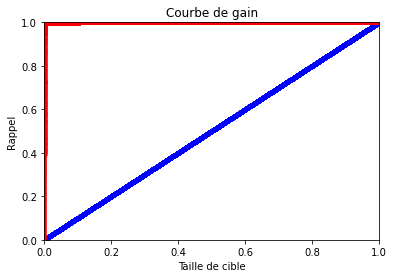

In [41]:
#graphique avec matplotlib
import matplotlib.pyplot as plt
#titre et en-têtes
plt.title('Courbe de gain') 
plt.xlabel('Taille de cible') 
plt.ylabel('Rappel')
#limites en abscisse et ordonnée
plt.xlim(0,1) 
plt.ylim(0,1)
#astuce pour tracer la diagonale
plt.scatter(taille,taille,marker='.',color='blue') 
#insertion du couple (taille, rappel)
plt.scatter(taille,rappel,marker='.',color='red')
#affichage
plt.show()
plt.cla()
plt.clf()
plt.close()

In [42]:
#recherche des 10000 / 148206 en se basant sur la taille
numpy.argwhere(taille <= 10000/148206)


array([[   0],
       [   1],
       [   2],
       ...,
       [9997],
       [9998],
       [9999]])

In [43]:
#indice = 9999, ce qui est logique
#quel est le rappel correspondant
prop_pos = rappel[9999]
print(prop_pos)


0.9967845659163987


In [44]:
#on multiple par le nombre de positifs
print(prop_pos * npos)

310.0
